<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Aug  3 21:29:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.70                 Driver Version: 560.70         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
| 23%   38C    P0             N/A /  N/A  |     578MiB /  11264MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
# Import torch
import torch
from tqdm.auto import tqdm

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.3.1+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

Here are the three example areas where computer vision is currently being used:
1) Medical imaging of X-rays to detect regions of internal organs or bones.
2) In construction, computer vision is used as a form of object detection to determine if workers are wearing safety equipment.
3) In farming, computer vision can monitor changes in plant growth or detect changes in form of malnutrition or disease.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting in machine learning is when a model yeild high prediction accuracy on trained data, but low accuracy on test data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Here are three ways to prevent over fitting:
1) Perform data augmenttation (ex/ flip, rotate, scale) to change the training set.
2) Focus the model training on most important features in a dataset.
3) Combine multiple models, picking the most accurate predicitons of each to create one with the most accurate predictions.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision

mnist_train = torchvision.datasets.MNIST(
  root="./datasets", 
  download=True,
  train=True,
  transform=torchvision.transforms.ToTensor(),
  target_transform=None
)

mnist_test = torchvision.datasets.MNIST(
  root="./datasets", 
  download=True,
  train=False,
  transform=torchvision.transforms.ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Training Images:  60000
 Testing Images:  10000
torch.Size([1, 28, 28])


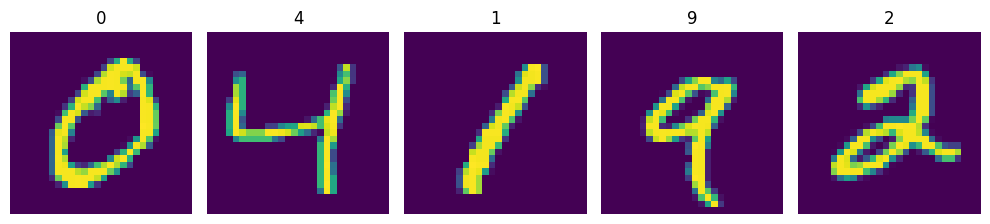

In [4]:
import matplotlib.pyplot as plt

print("Training Images: ", mnist_train.__len__())
print(" Testing Images: ", mnist_test.__len__())

image, label = mnist_train[0]
print(image.shape)


def plotMnistSamplesTraining(data:torchvision.datasets.MNIST):
  fig = plt.figure(figsize=(10, 10))
  
  for i in range(1, 6):
    img, label = data[i]
    fig.add_subplot(1, 5, i)
    plt.imshow(img.squeeze()) # removes color channels
    plt.title(label)
    plt.axis(False)
  plt.tight_layout()

plotMnistSamplesTraining(mnist_train)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

mnist_train_dataloader = DataLoader(
  dataset=mnist_train,
  batch_size=BATCH_SIZE,
  shuffle=True
)

mnist_test_dataloader = DataLoader(
  dataset=mnist_test,
  batch_size=BATCH_SIZE,
  shuffle=False
)

In [6]:
image, label = mnist_train_dataloader.dataset[0]

len(image.flatten())

784

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [17]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self, inshape:int, outshape:int, hidden_units:int):
    super().__init__()
    self.block_1= nn.Sequential(
      nn.Conv2d(
        in_channels=inshape,
        out_channels=hidden_units,
        kernel_size=3,
        padding=1,
        stride=1),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        padding=1,
        stride=1),
      nn.ReLU(),
      nn.MaxPool2d(
        kernel_size= 2,
        stride=2)
    )
    self.block_2 = nn.Sequential(
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        padding=1,
        stride=1
      ),
      nn.ReLU(),
      nn.Conv2d(
        in_channels=hidden_units,
        out_channels=hidden_units,
        kernel_size=3,
        padding=1,
        stride=1
      ),
      nn.ReLU(),
      nn.MaxPool2d(
        kernel_size= 2,
        stride=2
      )
    )
    self.layer_1 = nn.Sequential(
      nn.Flatten(),
      nn.Linear(
        in_features=hidden_units * 7 * 7, # flatten length of MNIST image
        out_features=outshape
      )
    )
    
  
  def forward(self, x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.layer_1(x)
    return x

torch.manual_seed(42)

model_cnn = CNN(
  inshape=1, 
  outshape=10,
  hidden_units=10
).to(device)

Loss Function and Optimizer

In [18]:
import torchmetrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

Function to chart program timming

In [19]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    
    return total_time

Creating functions to train and test models

In [23]:
import torchmetrics

def train_step(
    model: nn.Module,
    data_loader: DataLoader,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn: torchmetrics.Accuracy, 
    device: torch.device = device
):
    train_loss, train_accuracy = 0, 0
    model.to(device)
    accuracy_fn.to(device)

    for train_features, train_labels in data_loader:

        train_features = train_features.to(device) 
        train_labels = train_labels.to(device)

        model.train()
        # forward pass
        prediction = model(train_features)

        loss = loss_fn(prediction, train_labels)
        train_loss += loss

        train_accuracy += accuracy_fn(prediction.argmax(dim=1), train_labels)

        # Zero-gradients
        optimizer.zero_grad()

        # backpropagate
        loss.backward()

        # calculate gradients
        optimizer.step()

    # Calculate loss and accuracy per epoch
    train_loss /= len(data_loader)
    train_accuracy /= len(data_loader)
    print(f"Train Loss: {train_loss:0.5f} | Train Accuracy: {train_accuracy:0.5f}")

def test_step(
        model: nn.Module,
        data_loader: DataLoader,
        loss_fn:  nn.Module,
        accuracy_fn: torchmetrics.Accuracy,
        device: torch.device = device
):
    test_loss, test_accuracy = 0, 0 
    model.to(device)
    accuracy_fn.to(device)

    model.eval()
    with torch.inference_mode():
        for test_features, test_labels in data_loader:
            
            # Send data to target device
            test_features = test_features.to(device) 
            test_labels = test_labels.to(device)
            
            # Foreward pass
            predictions = model(test_features)

            # Calculate metrics
            loss = loss_fn(predictions, test_labels)
            test_loss += loss
            test_accuracy += accuracy_fn(predictions.argmax(dim=1), test_labels)

        # Print adjusted metrics per epoch
        test_loss /= len(data_loader)
        test_accuracy /= len(data_loader)
        print(f"Test Loss: {test_loss:0.5f} | Test Accuracy: {test_accuracy:0.5f}")

In [11]:
# #testing error:  TypeError: 'tuple' object is not callable
# # NOTE:: Solution, deleted commas at the end of definning self.conv()"," <<--- layers

# for (X,y) in mnist_test_dataloader:
#   X = X.to(device)
#   print(model_cnn(X))
#   break

Running training on CPU

In [12]:
EPOCHS = 5

device = 'cpu'
model_cnn.to(device)
accuracy_fn.to(device)

train_start = timer()
for epoch in tqdm(range(EPOCHS)):
  train_step(
    model = model_cnn,
    data_loader=mnist_train_dataloader,
    device = device,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    optimizer = optimizer
  )

  test_step(
    model = model_cnn,
    data_loader=mnist_test_dataloader,
    device = device,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
  )

train_end = timer()
print_train_time(start= train_start, end= train_end, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Train Loss: 0.27071 | Train Accuracy: 0.91185
Test Loss: 0.08228 | Test Accuracy: 0.97254
Train Loss: 0.06822 | Train Accuracy: 0.97872
Test Loss: 0.04437 | Test Accuracy: 0.98532
Train Loss: 0.05242 | Train Accuracy: 0.98390
Test Loss: 0.04059 | Test Accuracy: 0.98482
Train Loss: 0.04344 | Train Accuracy: 0.98630
Test Loss: 0.04133 | Test Accuracy: 0.98602
Train Loss: 0.03838 | Train Accuracy: 0.98752
Test Loss: 0.03466 | Test Accuracy: 0.98822
Train time on cpu: 175.837 seconds


175.83708360000128

Running Training on GPU

In [15]:
EPOCHS = 5

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_cnn = CNN(
  inshape=1, 
  outshape=10,
  hidden_units=10
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)

train_start = timer()
for epoch in tqdm(range(EPOCHS)):
  train_step(
    model = model_cnn,
    data_loader=mnist_train_dataloader,
    device = device,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    optimizer = optimizer
  )

  test_step(
    model = model_cnn,
    data_loader=mnist_test_dataloader,
    device = device,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
  )

train_end = timer()
gpu_time = print_train_time(start= train_start, end= train_end, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Train Loss: 0.42370 | Train Accuracy: 0.85135
Test Loss: 0.07198 | Test Accuracy: 0.97674
Train Loss: 0.07150 | Train Accuracy: 0.97768
Test Loss: 0.06091 | Test Accuracy: 0.97993
Train Loss: 0.05679 | Train Accuracy: 0.98278
Test Loss: 0.04902 | Test Accuracy: 0.98303
Train Loss: 0.04865 | Train Accuracy: 0.98418
Test Loss: 0.04170 | Test Accuracy: 0.98622
Train Loss: 0.04322 | Train Accuracy: 0.98603
Test Loss: 0.03953 | Test Accuracy: 0.98662
Train time on cuda: 87.194 seconds


In [94]:
torch.save(model_cnn.state_dict(), 'model_cnn.pth')

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

Model predicts: 5 | Actual: 5
Model predicts: 5 | Actual: 5
Model predicts: 3 | Actual: 3
Model predicts: 5 | Actual: 5
Model predicts: 7 | Actual: 7


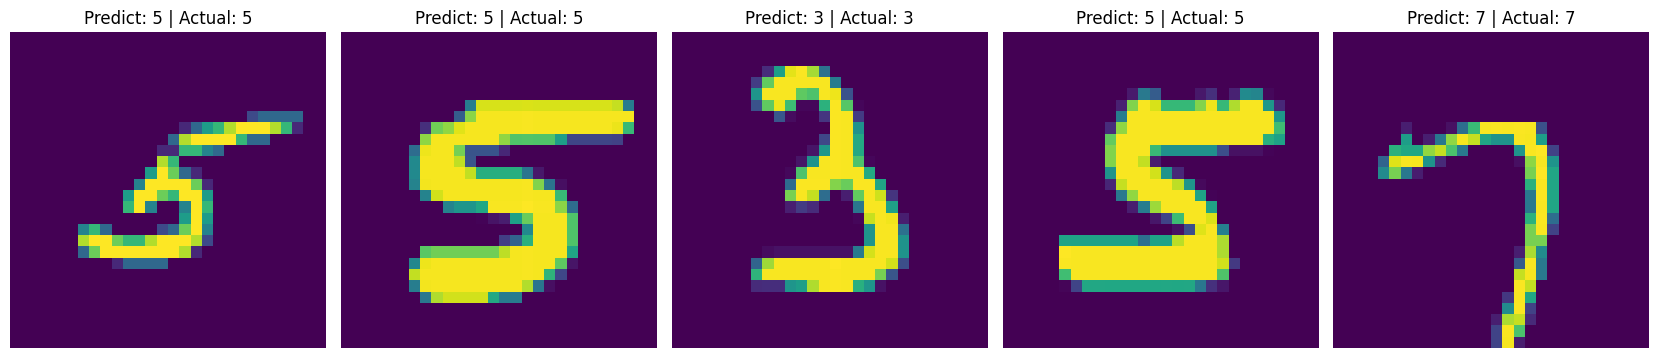

In [69]:
torch.manual_seed(42)
random_samples = torch.randint(low=0, high=len(mnist_test), size=(5,))

rand_imgs = []
fig = plt.figure(figsize=(20, 10))

for image_id in random_samples:
  rand_imgs.append(mnist_test[image_id])

model_cnn.eval()
with torch.inference_mode():
  for i, (image, label) in enumerate(rand_imgs):
    image = image.to(device)
    
    p_logit = model_cnn(image.unsqueeze(dim=1))
    p = torch.softmax(p_logit, dim=1)
    p_label = p.argmax(dim=1)
    print(f"Model predicts: {p_label.item()} | Actual: {label}")

    fig.add_subplot(1, 6, i+1)
    plt.imshow(image.cpu().squeeze()) # removes color channels
    plt.title(f"Predict: {p_label.item()} | Actual: {label}")
    plt.axis(False)
  plt.tight_layout()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [78]:
import mlxtend

model_cnn.eval()
p_labels = []
with torch.inference_mode():
  for i, (image, label) in tqdm(enumerate(mnist_test)):
    image = image.to(device)
    
    p_logit = model_cnn(image.unsqueeze(dim=1))
    p = torch.softmax(p_logit, dim=1)
    p_labels.append(p.argmax(dim=1))
  p_labels = torch.cat(p_labels).cpu()
  
print(f"Number of predictions {p_labels.__len__()} | Actual number of predictions {mnist_test.__len__()}")


0it [00:00, ?it/s]

Number of predictions 10000 | Actual number of predictions 10000


Plotting confusion matrix

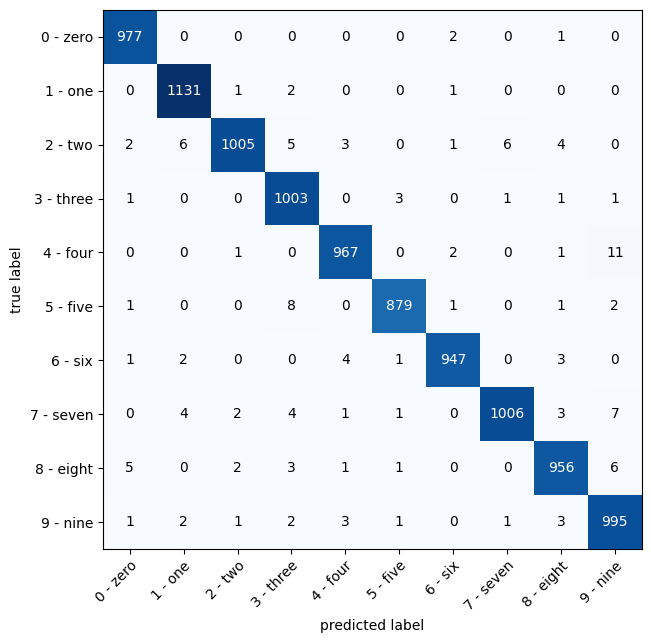

In [79]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
confmat_tensor = confmat(preds=p_labels,
                         target=mnist_test.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=mnist_test.classes,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [93]:
rand_tenesor = torch.rand([1, 3, 64, 64])
print(f"Size of original tensor | {rand_tenesor.shape}")

kernel_size = 3
x = nn.Conv2d(in_channels= 3,
              out_channels=64,
              kernel_size=kernel_size,
              padding=1,
              stride=2
            )

print(f"Size when kernel = {kernel_size} | {x(rand_tenesor).shape}")

kernel_size = 10
x = nn.Conv2d(in_channels= 3,
              out_channels=64,
              kernel_size=kernel_size,
              padding=1,
              stride=2
            )

print(f"Size when kernel = {kernel_size} | {x(rand_tenesor).shape}")

kernel_size = 1
x = nn.Conv2d(in_channels= 3,
              out_channels=64,
              kernel_size=kernel_size,
              padding=1,
              stride=2
            )

print(f"Size when kernel = {kernel_size} | {x(rand_tenesor).shape}")

Size of original tensor | torch.Size([1, 3, 64, 64])
Size when kernel = 3 | torch.Size([1, 64, 32, 32])
Size when kernel = 10 | torch.Size([1, 64, 29, 29])
Size when kernel = 1 | torch.Size([1, 64, 33, 33])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

Collect FashionMNIST data and create Test / Train Dataloaders for them.

In [12]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

BATCH_SIZE = 32
torch.manual_seed(42)

fashionMNIST_Train = FashionMNIST(
  root='datasets',
  train=True,
  download=True,
  transform=ToTensor()
)

fashionMNIST_Test = FashionMNIST(
  root='datasets',
  train=False,
  download=True,
  transform=ToTensor()
)

fashionMNIST_Train_dataloader = DataLoader(
  dataset=fashionMNIST_Train,
  batch_size = BATCH_SIZE,
  shuffle=True
)

fashionMNIST_Test_dataloader = DataLoader(
  dataset=fashionMNIST_Test,
  batch_size = BATCH_SIZE,
  shuffle=True
)

Show a sample image from train Dataloader

Train img shape: torch.Size([32, 1, 28, 28]) | Train Lables: torch.Size([32])


(-0.5, 27.5, 27.5, -0.5)

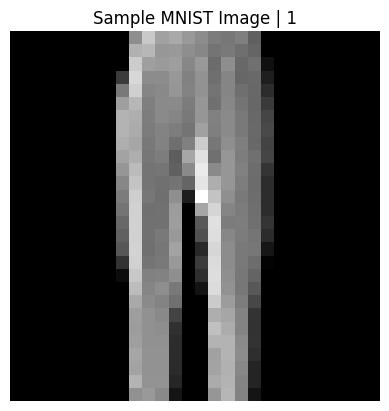

In [14]:
import matplotlib.pyplot as plt

# Return BATCH_SIZE of images
train_batch_imgs, train_batch_labels = next(iter(fashionMNIST_Train_dataloader))
print(f"Train img shape: {train_batch_imgs.size()} | Train Lables: {train_batch_labels.size()}")

sample_fashionMNIST_img = train_batch_imgs[0].squeeze()
sample_fashionMNIST_label = train_batch_labels[0]

plt.imshow(sample_fashionMNIST_img, cmap='gray')
plt.title(f"Sample MNIST Image | {sample_fashionMNIST_label}")
plt.axis(False)

Load model to predict fashinMNIST images

In [24]:
EPOCHS = 5

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_cnn = CNN(
  inshape=1, 
  outshape=10,
  hidden_units=10
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=0.1)
accuracy_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)

train_start = timer()
for epoch in tqdm(range(EPOCHS)):
  train_step(
    model = model_cnn,
    data_loader=fashionMNIST_Train_dataloader,
    device = device,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    optimizer = optimizer
  )

  test_step(
    model = model_cnn,
    data_loader=fashionMNIST_Test_dataloader,
    device = device,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
  )

train_end = timer()
gpu_time = print_train_time(start= train_start, end= train_end, device=device)
  

  0%|          | 0/5 [00:00<?, ?it/s]

Train Loss: 0.65434 | Train Accuracy: 0.76153
Test Loss: 0.38985 | Test Accuracy: 0.85553
Train Loss: 0.34928 | Train Accuracy: 0.87582
Test Loss: 0.34902 | Test Accuracy: 0.87780
Train Loss: 0.31346 | Train Accuracy: 0.88743
Test Loss: 0.31628 | Test Accuracy: 0.88798
Train Loss: 0.29205 | Train Accuracy: 0.89423
Test Loss: 0.36564 | Test Accuracy: 0.86821
Train Loss: 0.28095 | Train Accuracy: 0.89793
Test Loss: 0.31124 | Test Accuracy: 0.88778
Train time on cuda: 79.357 seconds


Save fashionMNIST model.

In [25]:
torch.save(model_cnn.state_dict(), 'model_cnn_fashionMNIST')

Load model for evaluation

In [26]:
model_cnn_fashionMNIST = CNN(
  inshape=1, 
  outshape=10,
  hidden_units=10
).to(device)

model_cnn_fashionMNIST.load_state_dict(torch.load('model_cnn_fashionMNIST'))

<All keys matched successfully>

Evaluate model on test fashionMNIST data

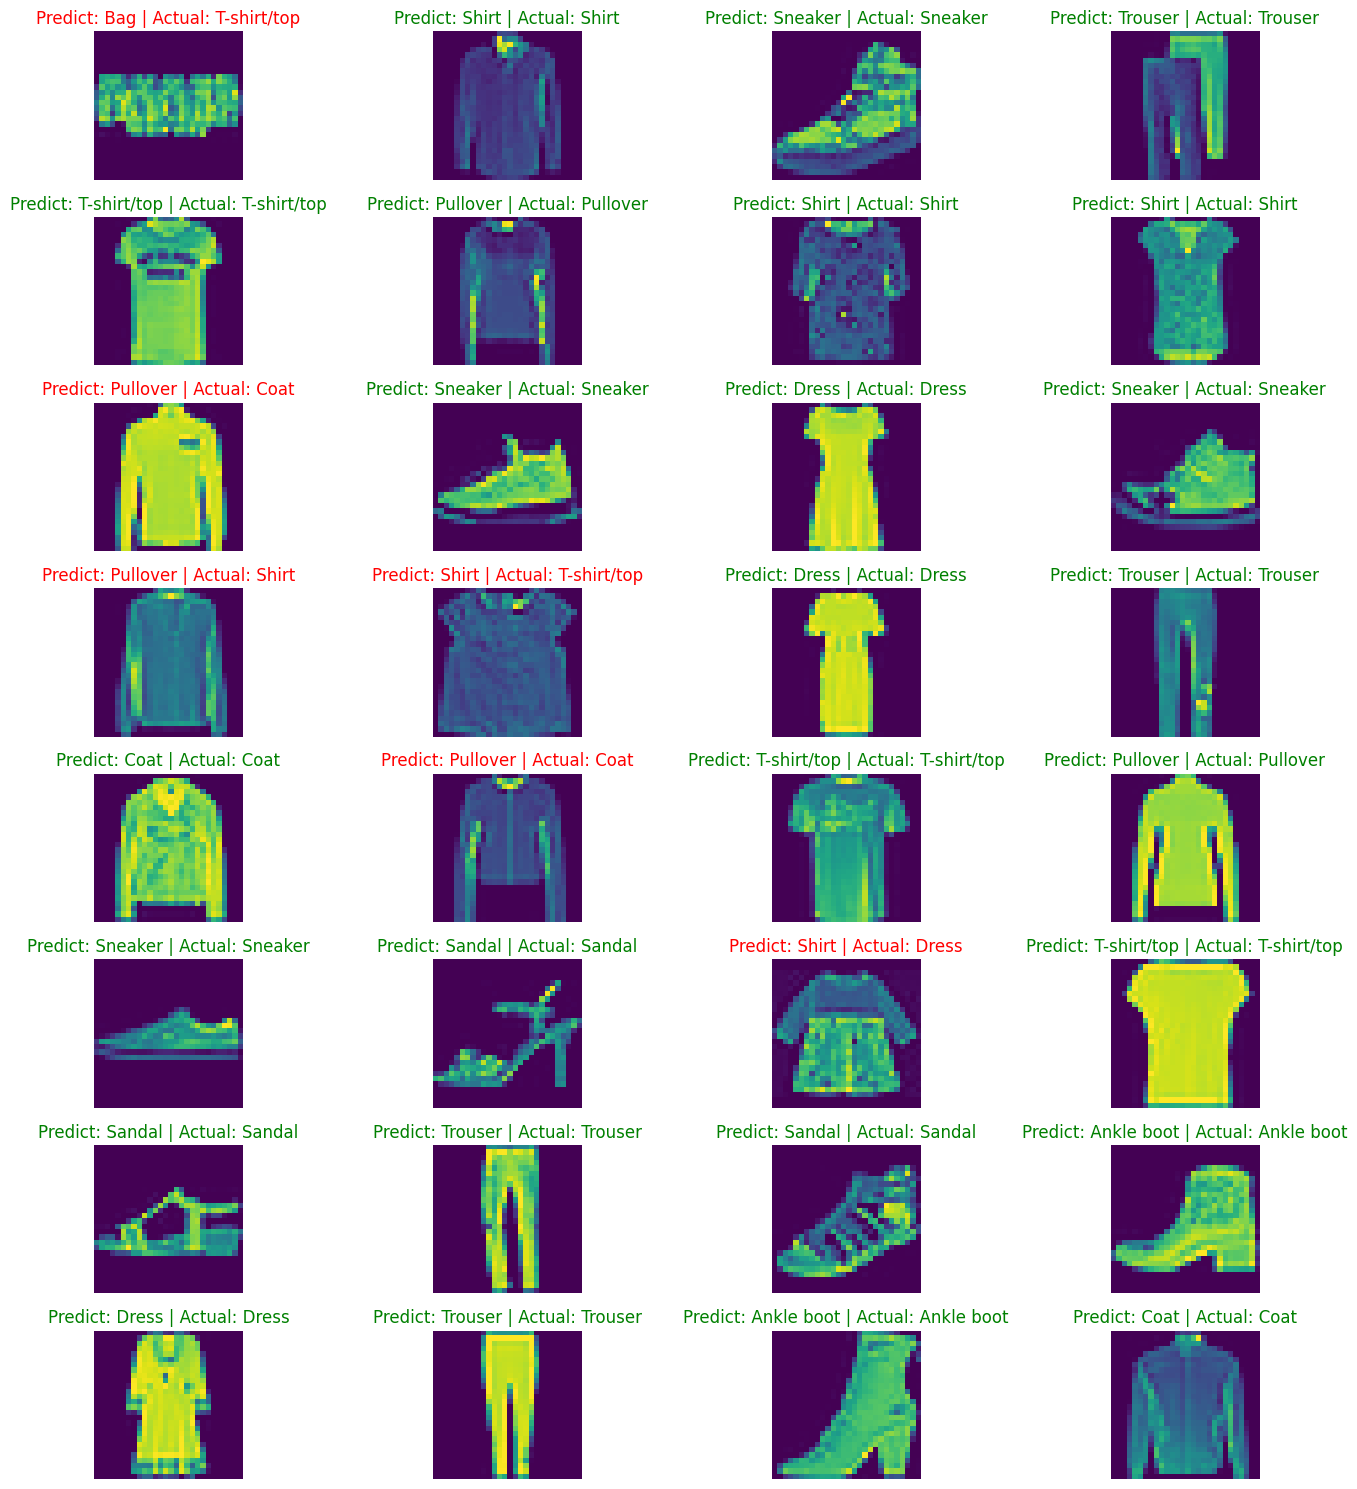

In [55]:
random_samples = torch.randint(low=0, high=len(fashionMNIST_Test) -1, size=(32,))

rand_imgs = []

for image_id in random_samples:
  rand_imgs.append(fashionMNIST_Test[image_id])


fig, axs = plt.subplots(8, 4, figsize=(15, 15))
axs = axs.flatten()

model_cnn.eval()
with torch.inference_mode():
  for i, (image, label) in enumerate(rand_imgs):
    image = image.to(device)
    
    p_logit = model_cnn_fashionMNIST(image.unsqueeze(dim=1))
    p = torch.softmax(p_logit, dim=1)
    p_label = p.argmax(dim=1)
    # print(f"Model predicts: {p_label.item()} | Actual: {label}")

    if p_label.item() == label:
      c = 'g'
    else:
      c = 'r'

    p_label = fashionMNIST_Test.classes[p_label.item()]
    label = fashionMNIST_Test.classes[label]

    axs[i].imshow(image.cpu().squeeze()) # removes color channels
    axs[i].set_title(f"Predict: {p_label} | Actual: {label}", c=c)
    axs[i].axis(False)
  plt.tight_layout()

0it [00:00, ?it/s]

Number of predictions 10000 | Actual number of predictions 10000


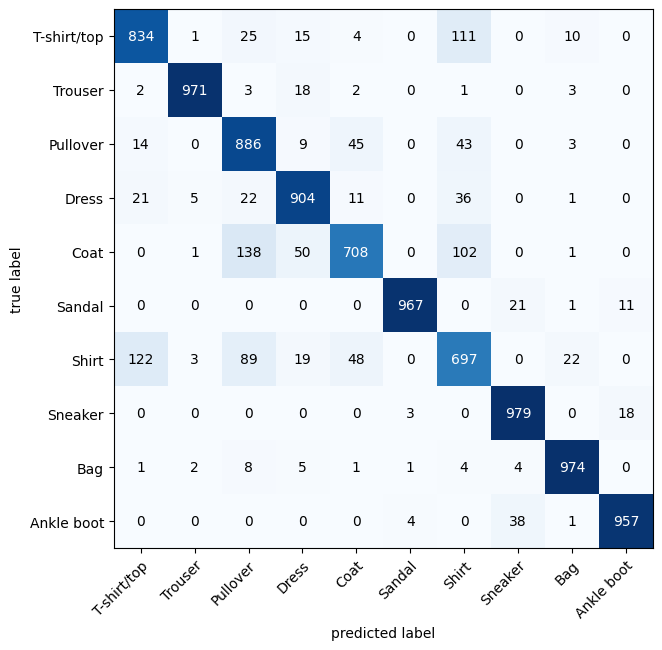

In [54]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


model_cnn_fashionMNIST.eval()
p_labels = []
with torch.inference_mode():
  for i, (image, label) in tqdm(enumerate(fashionMNIST_Test)):
    image = image.to(device)
    
    p_logit = model_cnn_fashionMNIST(image.unsqueeze(dim=1))
    p = torch.softmax(p_logit, dim=1)
    p_labels.append(p.argmax(dim=1))
  p_labels = torch.cat(p_labels).cpu()
  
print(f"Number of predictions {p_labels.__len__()} | Actual number of predictions {fashionMNIST_Test.__len__()}")

# Setup confusion matrix 
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
confmat_tensor = confmat(preds=p_labels,
                         target=fashionMNIST_Test.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=fashionMNIST_Test.classes,
    figsize=(10, 7)
)